<a href="https://colab.research.google.com/github/shiwangi27/googlecolab/blob/main/optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Basic Machine Learning optimizations

For this learning, I used Andrej Karpathy's [cs231n](https://cs231n.github.io/) class lectures and [ml-cheatsheet](https://ml-cheatsheet.readthedocs.io/en/latest) docs.

Following are the topics I have tried:

1. Random Local Search 
2. Gradient Descent for Linear Regression
3. Gradient Descent with L2 Regularization
4. Multilayer Perceptron 
5. Logistic Regression Classifier
6. 2-layer NN Classifier in Tensorflow 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def plot_curve(metricx, metricy):
  fig = plt.figure(figsize=(5, 5))
  plt.plot(metricx, metricy, color="blue")
  plt.xlabel("mean loss")
  plt.ylabel("iteration")

### Generate Random Data

In [9]:
num_features = 20
num_train_examples = 900
num_test_examples = 100 

X_train = np.random.random((num_train_examples, num_features))
y_train = np.random.random((num_train_examples, 1)) 
X_test = np.random.random((num_test_examples, num_features)) 
y_test = np.random.random((num_test_examples, 1))

### Random Local Search optimization

Every single step of the iteration we would take a step ever so small in the direction towards the goal (which is minima). This step is a small random number added to the weight and we check if the loss is lower than the minimum loss so far. 


In [10]:
num_iterations = 1000
num_coefficients = 5 

# Initialize the weights and biases
W = np.random.random((num_features, num_coefficients))
b = np.ones((num_coefficients))

In [11]:
factor = 0.01
best_loss = float("inf")

Wi = W*0.001
bi = b.copy()

losses = []

for i in range(num_iterations):
  dW = factor * np.random.randn(num_features, num_coefficients)
  Wi = Wi + dW

  y_hat = X_train.dot(Wi) + bi
  loss = y_hat - y_train

  mean_loss = np.mean(loss)
  losses.append(mean_loss)

  if mean_loss < best_loss:
    best_loss = mean_loss

  print("iteration %s loss = %s:" % (i, best_loss))

iteration 0 loss = 0.5267222349298863:
iteration 1 loss = 0.5267222349298863:
iteration 2 loss = 0.5267222349298863:
iteration 3 loss = 0.5267222349298863:
iteration 4 loss = 0.5267222349298863:
iteration 5 loss = 0.5267222349298863:
iteration 6 loss = 0.5267222349298863:
iteration 7 loss = 0.5267222349298863:
iteration 8 loss = 0.5267222349298863:
iteration 9 loss = 0.5267222349298863:
iteration 10 loss = 0.5267222349298863:
iteration 11 loss = 0.5267222349298863:
iteration 12 loss = 0.5267222349298863:
iteration 13 loss = 0.5267222349298863:
iteration 14 loss = 0.5267222349298863:
iteration 15 loss = 0.5267222349298863:
iteration 16 loss = 0.5267222349298863:
iteration 17 loss = 0.5267222349298863:
iteration 18 loss = 0.5267222349298863:
iteration 19 loss = 0.5267222349298863:
iteration 20 loss = 0.5267222349298863:
iteration 21 loss = 0.5267222349298863:
iteration 22 loss = 0.5267222349298863:
iteration 23 loss = 0.5267222349298863:
iteration 24 loss = 0.5267222349298863:
iteration 

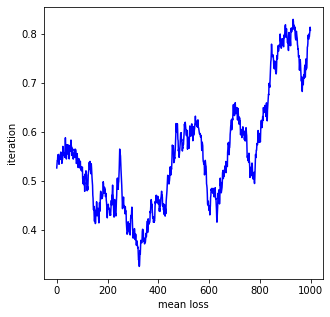

In [12]:
plot_curve(range(num_iterations), losses)

### Gradient Descent Optimization

In this technique, we would calculate partial derivatives w.r.t weights and biases of a convex function (differentiable functions).


In [13]:
num_iterations = 1000
lr = 0.001
N = num_train_examples
Wj = W.copy()
bj = b.copy()
best_loss = float("inf")
losses = []

for i in range(num_iterations): 
  # error = (y - (W.x + b))
  # L = 1/2 * (y - (W.x + b))**2

  y_hat = X_train.dot(Wj) + bj 
  error = y_train - y_hat
  loss = 1/2 * (y_train - y_hat)**2
  
  # dL/dW = [y - (W.x + b)] . (-x)
  # dL/dW =  error . (-x)

  dW = np.dot(-X_train.T, error) / N 
  db = -error / N

  Wj = Wj - lr * dW 
  bj = bj - lr * db

  mean_loss = np.sum(loss) / N
  losses.append(mean_loss)

  if mean_loss < best_loss:
    best_loss = mean_loss

  print("iter %s, loss is %s" % (i, best_loss)) 


iter 0, loss is 78.35036235953841
iter 1, loss is 77.55345739716022
iter 2, loss is 76.7647222072433
iter 3, loss is 75.98407302683736
iter 4, loss is 75.21142695179736
iter 5, loss is 74.44670192797814
iter 6, loss is 73.68981674251961
iter 7, loss is 72.94069101522128
iter 8, loss is 72.19924519000506
iter 9, loss is 71.46540052646577
iter 10, loss is 70.7390790915082
iter 11, loss is 70.02020375106989
iter 12, loss is 69.30869816192879
iter 13, loss is 68.60448676359498
iter 14, loss is 67.90749477028542
iter 15, loss is 67.2176481629811
iter 16, loss is 66.53487368156547
iter 17, loss is 65.85909881704359
iter 18, loss is 65.19025180384108
iter 19, loss is 64.52826161218195
iter 20, loss is 63.87305794054453
iter 21, loss is 63.22457120819491
iter 22, loss is 62.58273254779685
iter 23, loss is 61.94747379809736
iter 24, loss is 61.318727496687444
iter 25, loss is 60.69642687283697
iter 26, loss is 60.08050584040304
iter 27, loss is 59.470898990811015
iter 28, loss is 58.86754158610

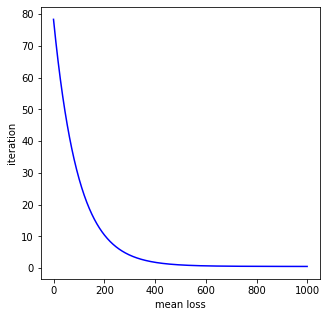

In [14]:
plot_curve(range(num_iterations), losses)

### L2 Regularization

Adding the L2 penalty to the loss function. lambda is a hyperparameter.  

loss = (X.w + b) + lambda * sum(w^2)




In [15]:
lr = 0.001
lmda = 0.001
N = num_train_examples
Wj = W.copy()
bj = b.copy()
best_loss = float("inf")
losses = []

for i in range(num_iterations): 
  y_hat = X_train.dot(Wj) + bj + lmda * np.sum(Wj**2)
  error = y_train - y_hat
  loss = 1/2 * (y_train - y_hat)**2
  
  # Derivative of the L2 penalty is (2 * lambda * W)
  dW = (np.dot(-X_train.T, error) - 2 * lmda * Wj) / N 
  db = -error / N

  Wj = Wj - lr * dW 
  bj = bj - lr * db

  mean_loss = np.sum(loss) / N
  losses.append(mean_loss)

  if mean_loss < best_loss:
    best_loss = mean_loss

  print("iter %s, loss is %s" % (i, best_loss)) 


iter 0, loss is 79.31977831420559
iter 1, loss is 78.50506055971292
iter 2, loss is 77.6988206374902
iter 3, loss is 76.90096964135016
iter 4, loss is 76.11141960796311
iter 5, loss is 75.33008350669562
iter 6, loss is 74.55687522956084
iter 7, loss is 73.79170958128017
iter 8, loss is 73.03450226945397
iter 9, loss is 72.28516989484054
iter 10, loss is 71.54362994174247
iter 11, loss is 70.80980076849823
iter 12, loss is 70.08360159807894
iter 13, loss is 69.36495250878805
iter 14, loss is 68.65377442506365
iter 15, loss is 67.94998910838157
iter 16, loss is 67.25351914825869
iter 17, loss is 66.56428795335474
iter 18, loss is 65.88221974267209
iter 19, loss is 65.20723953685209
iter 20, loss is 64.53927314956653
iter 21, loss is 63.878247179004084
iter 22, loss is 63.224088999449684
iter 23, loss is 62.576726752956354
iter 24, loss is 61.93608934110831
iter 25, loss is 61.302106416874174
iter 26, loss is 60.674708376549596
iter 27, loss is 60.05382635178779
iter 28, loss is 59.439392

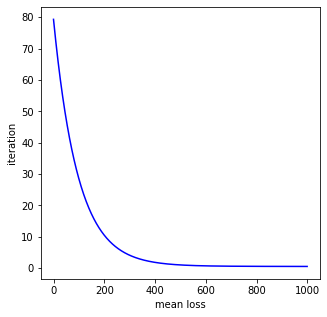

In [16]:
plot_curve(range(num_iterations), losses)

### Create loss and gradient functions

Let's create functions and re-write the SGD optimization code.

In [17]:
def l2_loss(y, y_hat): 
  return np.sum((y - y_hat)**2) / (2*len(y))

def l1_loss(y, y_hat):
  return np.sum(np.abs(y - y_hat)) / len(y)

def grad_l2_loss(y, y_hat):
  return y - y_hat

def gradient(loss_func, preds, X, y, weight, bias, lr): 
  error = loss_func(y, preds)
  
  dW = np.dot(-X.T, error) / N
  db = -error / N

  weight = weight - lr * dW 
  bias = bias - lr * db

  return y_hat, weight, bias


In [18]:
lr = 0.001
weight = W.copy()
bias = b.copy()
best_loss = float("inf")
losses = []

for i in range(num_iterations):
  y_hat = np.dot(X_train, weight) + bias
  y_hat, weight, bias = gradient(grad_l2_loss, y_hat, X_train, y_train, weight, bias, lr)
  loss = l2_loss(y_train, y_hat)

  losses.append(loss)
  if loss < best_loss:
    best_loss = loss
  print("iter %s, loss = %s" % (i, loss))


iter 0, loss = 78.35036235953841
iter 1, loss = 77.55345739716022
iter 2, loss = 76.7647222072433
iter 3, loss = 75.98407302683736
iter 4, loss = 75.21142695179736
iter 5, loss = 74.44670192797814
iter 6, loss = 73.68981674251961
iter 7, loss = 72.94069101522128
iter 8, loss = 72.19924519000506
iter 9, loss = 71.46540052646577
iter 10, loss = 70.7390790915082
iter 11, loss = 70.02020375106989
iter 12, loss = 69.30869816192879
iter 13, loss = 68.60448676359498
iter 14, loss = 67.90749477028542
iter 15, loss = 67.2176481629811
iter 16, loss = 66.53487368156547
iter 17, loss = 65.85909881704359
iter 18, loss = 65.19025180384108
iter 19, loss = 64.52826161218195
iter 20, loss = 63.87305794054453
iter 21, loss = 63.22457120819491
iter 22, loss = 62.58273254779685
iter 23, loss = 61.94747379809736
iter 24, loss = 61.318727496687444
iter 25, loss = 60.69642687283697
iter 26, loss = 60.08050584040304
iter 27, loss = 59.470898990811015
iter 28, loss = 58.867541586107535
iter 29, loss = 58.27036

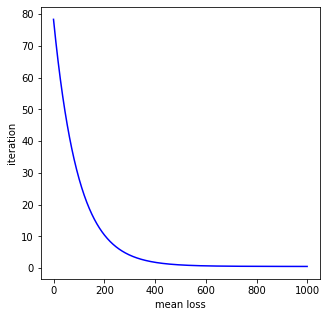

In [19]:
plot_curve(range(num_iterations), losses)

### Multilayer Perceptron


In [20]:
# Lets make some data
num_classes = 2 
num_units = 50
num_out = 1

X_train = np.random.random((num_train_examples, num_features))
y_train = np.random.random((num_train_examples, 1)) 
# y_train = np.random.randint(0, num_classes, num_train_examples)
# y_train = y_train.reshape(y_train.shape[0], 1)


In [21]:
# Initialize weights

Wh = np.random.random((num_features, num_units)) * (2/num_features)
Wo = np.random.random((num_units, num_out)) * (2/num_units)

bh = np.ones((1, num_units)) * 0.1
bo = np.ones((1, num_out)) * 0.1

In [22]:
# ReLU function and its gradient.

def relu(z):
  return np.maximum(0, z)

def grad_relu(z):
  z[z > 0] = 1 
  z[z < 0] = 0
  return z


In [23]:
"""
1-layer Neural Network with ReLU activations.
h = relu(Wh.x + bh) 
y_hat = relu(Wo.h + bo)
"""
def feed_forward_nn(X, Wh, Wo, bh, bo):

  zh = np.dot(X, Wh) + bh
  # print("Shape zh", zh.shape)

  h = relu(zh)
  # print("Shape h", h.shape)

  zo = np.dot(h, Wo) + bo
  # print("Shape zo", zo.shape)

  y_hat = relu(zo)
  # print("Shape y_hat", y_hat.shape)

  return y_hat, zo, h, zh


In [ ]:
y_hat = feed_forward_nn(X_train, Wh, Wo, bh, bo)

In [25]:
"""
Derivatives of the above network: 

L = 1/2 * (y - y_hat)**2

Eo = (y - relu(h.wo + bo)) = (y - y_hat) * grad_relu(h.wo + bo)
Eh = (y - y_hat) * grad_relu(h.wo + bo) * wo * grad_relu(x.wh + bh) = Eo * wo * grad_relu(x.wh + bh)

dWo = Eo * h 
dWh = Eh * x 

Explanation:

Initially, L' = (y - y_hat).
Expanding y_hat and taking y_hat' = grad_relu(h.wo + bo) * h. 
Since in grad_relu, we have Wh variable, the derivative of (h.wo + bo) = wo. 
Expanding h and taking h' = grad_relu(x.wh + bh) * x 

Chain Rule baby! 

Wo = Wo - lr * dWo 
Wh = Wh - lr * dWh

"""

def backpropagate(y_hat, X, y, Wh, Wo, bh, bo, zo, h, zh, lr):
  N = len(y_hat)

  error = (y_hat - y)
  relu_zo = grad_relu(zo)
  Eo = error * relu_zo
  
  sig_zh = grad_relu(zh)
  Eo_wo = Eo * Wo.T
  Eh = Eo_wo * sig_zh
  
  dWo = np.dot(h.T, Eo)
  dWh = np.dot(X.T, Eh) 

  dbo = Eo 
  dbh = Eo * 1 * sig_zh * 1  # Since zo' wrt bo = 1. 
  
  # So it took me a lot of trials before I got the matrix multiplications right.
  # I worked out each variable shape and had to math it out to get it right.  

  dWo = dWo/N
  dWh = dWh/N
  dbo = dbo/N
  dWh = dWh/N

  Wo = Wo - lr * dWo 
  Wh = Wh - lr * dWh

  bo = bo - lr * dbo
  bh = bh - lr * dbh 

  return Wh, Wo, bh, bo 
  

In [26]:
lr = 0.0001

# Initialize weights
Wh = np.random.random((num_features, num_units)) * np.sqrt(2/num_features)
Wo = np.random.random((num_units, num_out)) * np.sqrt(2/num_units)
bh = np.ones((1, num_units)) * 0.1
bo = np.ones((1, num_out)) * 0.1

best_loss = float("inf")
losses = []

for i in range(num_iterations):
  y_hat, zo, h, zh = feed_forward_nn(X_train, Wh, Wo, bh, bo)
  loss = l2_loss(y_train, y_hat)
  Wh, Wo, bh, bo = backpropagate(y_hat, X_train, y_train, Wh, Wo, bh, bo, zo, h, zh, lr)

  losses.append(loss)
  if loss < best_loss:
    best_loss = loss
  print("iter %s, loss = %s" % (i, loss))


iter 0, loss = 35.171911682919465
iter 1, loss = 34.11864388608385
iter 2, loss = 33.09838104278462
iter 3, loss = 32.11002673401755
iter 4, loss = 31.15252370909509
iter 5, loss = 30.224852363581054
iter 6, loss = 29.326029281969458
iter 7, loss = 28.455105842090692
iter 8, loss = 27.61116687838206
iter 9, loss = 26.7933294013044
iter 10, loss = 26.00074137032355
iter 11, loss = 25.2325805180049
iter 12, loss = 24.488053222891782
iter 13, loss = 23.766393428954057
iter 14, loss = 23.066861609503064
iter 15, loss = 22.38874377357252
iter 16, loss = 21.73135051286327
iter 17, loss = 21.094016087442533
iter 18, loss = 20.476097548476414
iter 19, loss = 19.87697389635764
iter 20, loss = 19.296045272669563
iter 21, loss = 18.732732184502247
iter 22, loss = 18.186474759707313
iter 23, loss = 17.65673203174565
iter 24, loss = 17.142981252845733
iter 25, loss = 16.644717234250752
iter 26, loss = 16.16145171239046
iter 27, loss = 15.69271273986771
iter 28, loss = 15.238044100201682
iter 29, lo

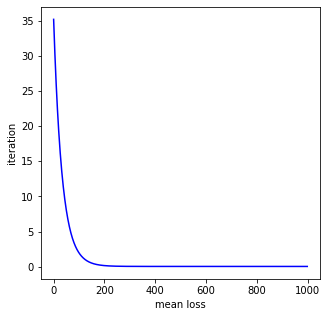

In [27]:
plot_curve(range(num_iterations), losses)

### Logistic Regression Classifier

So far, we have seen regression algorithms. We will now see a classification algorithm. Logistic Regression uses the `sigmoid` as the output function. sigmoid function transforms the predictions into a range [0, 1] which can be nicely used as a probability score for a class prediction. 

In [28]:
# Sigmoid function and its gradient.

"""
sig = 1 / (1 + e^(-x)) 
"""
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

"""
Derivative of sigmoid:
dsig = (-1 / (1 + e^(-x))^2) * e^(-x) * (-1)
dsig =  e^(-x) / (1 + e^(-x))^2

Adding +1 and -1 to the numerator:
dsig = (1 + e^(-x) - 1) / (1 + e^(-x))^2

Let's replace deno = 1 + e^(-x) in the equation so its easier to operate: 
dsig = (deno - 1) / deno^2

Splitting the denominator into two deno:
dsig = (deno/deno - 1/deno ) * (1/deno)

Replace sig = 1/deno: 
dsig = (1 - sig) * sig
"""

def grad_sigmoid(z):
  sig = sigmoid(z)
  return (1 - sig) * sig


In [31]:
# Try out some random values and see the sigmoid transformation on the values. All the values should be squished between [0, 1]

sigmoid(np.array([1.083579, -0.446771, -0.123665, 0.899643]))

array([0.74717068, 0.39012876, 0.46912309, 0.71087613])

### Let's make some classification data

In [39]:
num_train_examples = 900
num_features = 20 
num_classes = 2 

# let's make some data 
X_train = np.random.random((num_train_examples, num_features))
y_train = np.random.randint(0, 2, num_train_examples)

In [40]:
print(X_train[:5], y_train[:5])

[[0.31294739 0.93171592 0.75895225 0.16212908 0.56493403 0.13445388
  0.58639983 0.92582337 0.60864097 0.49944246 0.74619062 0.5634484
  0.62345999 0.24219214 0.89931828 0.43328129 0.58817594 0.43594389
  0.67130117 0.94051155]
 [0.17769229 0.77488881 0.7821518  0.76317354 0.71561888 0.70656117
  0.64444283 0.89239545 0.45000869 0.79368506 0.44461913 0.17038028
  0.33162837 0.07356898 0.12816893 0.70455349 0.5150542  0.7316682
  0.17996505 0.24687717]
 [0.84466303 0.47506014 0.10630105 0.47119152 0.35862454 0.64153631
  0.42304303 0.95178009 0.95675142 0.60883918 0.67516046 0.09379607
  0.13450048 0.12385304 0.81255077 0.56839223 0.62650793 0.23614535
  0.5199379  0.06343868]
 [0.80746893 0.51279563 0.14671142 0.94925631 0.61364    0.70238355
  0.55791921 0.48057762 0.881722   0.91611089 0.95986015 0.11411736
  0.4009185  0.37218945 0.77225581 0.50521593 0.63781296 0.01456454
  0.3987808  0.03697269]
 [0.73384056 0.50944631 0.1790313  0.13923337 0.71027708 0.53548879
  0.99336658 0.579

### Cross-Entropy loss or log loss.

Cross Entropy is the measure of dissimilarity between two probability distributions. We measure the entropy of the distribution q relative to the distribution p using the formula (its derivation stems from KL divergence): 

H(p, q) = - p log (q) 

Let's say we have p as true label and q as predicted value. Let's assume we have two class labels 0 and 1. For a logistic regression, the value of 

q (y=1) = y_hat = sigmoid(x*w) 

q (y=0) = 1 - y_hat. 

For our binary outcome, we will have the following function for entropy: 

H(p, q) = - y log (y_hat) - (1 - y) log (1 - y_hat) 

The above can be derived from the bernoulli outcome too. f(p,q) = (q^p) (1-q)^(1-p)


In [41]:
def cross_entropy_loss(y, y_hat):
  loss = - y * np.log(y_hat) - (1- y) * np.log(1 - y_hat)
  mean_loss = np.sum(loss) / len(y)
  return mean_loss

In [43]:
cross_entropy_loss(np.array([0, 1, 0]), np.array([0.12, 0.98, 0.001]))

0.049678859720329295

### Gradient Descent for Cross Entropy Loss and Logistic Regression.

Above we derived the sig' = (1 - sig)sig 

It can be proven that the derivative of the cross entropy loss function is: 

grad = x * (sig - y)

In [45]:
def backprop_cross_entropy(y_hat, X, y, W, b, lr):
  error = y_hat - y
  dW = np.dot(X.T, error)
  db = np.sum(error)

  dW = dW/len(y)
  db = db/len(y)

  W = W - lr * dW
  b = b - lr * db

  return W, b


In [49]:
lr = 0.0001
num_iterations = 1000 
losses = []
num_features = 20 
num_coefficients = 1 

# Initialize the weights and biases
W = np.random.random((num_features, num_coefficients))
b = np.ones((num_coefficients))

for i in range(num_iterations):
  z = np.dot(X_train, W) + b
  y_hat = sigmoid(z)

  loss = cross_entropy_loss(y_train, y_hat)
  
  W, b = backprop_cross_entropy(y_hat, X_train, y_train, W, b, lr)

  losses.append(loss)

  print("iter %s, loss = %s" % (i, loss))



iter 0, loss = 2266.6045423440564
iter 1, loss = 2266.3878417137826
iter 2, loss = 2266.171142461604
iter 3, loss = 2265.954444588157
iter 4, loss = 2265.737748094084
iter 5, loss = 2265.521052980025
iter 6, loss = 2265.30435924662
iter 7, loss = 2265.0876668945134
iter 8, loss = 2264.870975924345
iter 9, loss = 2264.654286336756
iter 10, loss = 2264.437598132391
iter 11, loss = 2264.220911311892
iter 12, loss = 2264.0042258759013
iter 13, loss = 2263.7875418250605
iter 14, loss = 2263.570859160015
iter 15, loss = 2263.3541778814083
iter 16, loss = 2263.1374979898837
iter 17, loss = 2262.920819486087
iter 18, loss = 2262.704142370662
iter 19, loss = 2262.487466644252
iter 20, loss = 2262.2707923075054
iter 21, loss = 2262.0541193610657
iter 22, loss = 2261.8374478055775
iter 23, loss = 2261.6207776416904
iter 24, loss = 2261.4041088700455
iter 25, loss = 2261.1874414912972
iter 26, loss = 2260.9707755060863
iter 27, loss = 2260.7541109150616
iter 28, loss = 2260.53744771887
iter 29, lo

### 2-Layer Neural Network Classifier in Tensorflow

In [39]:
import tensorflow as tf

In [40]:
def softmax(z):
  _exp = np.exp(z)
  return _exp/np.sum(_exp)

In [43]:
# Softmax squishes the array values between [0, 1] such that the sum of all values is 1. 
# Great for getting class probabilities in a neural network. Historically used in Logistic Regression.  

softmax([0.346, 0.283, 0.965])

array([0.26343426, 0.24734988, 0.48921587])

In [355]:
num_train_examples = 900
num_features = 20 
num_classes = 2 

# let's make some data 
X_train = tf.random.normal((num_train_examples, num_features), dtype=tf.float32)
y_train_cat = tf.random.categorical(tf.math.log([[0.5, 0.5]]), num_train_examples)
y_train_cat = tf.reshape(y_train_cat, [num_train_examples])

In [356]:
num_units_1 = 20 
num_units_2 = 10 
num_out = 2 

def init_weights(num_features, num_units):
  w_init = tf.random_normal_initializer()
  b_init = tf.zeros_initializer()

  W = tf.Variable(initial_value=w_init(shape=(num_features, num_units)), trainable=True)
  b = tf.Variable(initial_value=b_init(shape=(num_units)), trainable=True)

  return W, b

def linear_layer(X, W, b):
  y = tf.matmul(X, W) + b  # You could also write X @ W for dot product.  
  return y

# Initialize the weights and biases
Wh1, bh1 = init_weights(num_features, num_units_1)
Wh2, bh2 = init_weights(num_units_1, num_units_2)
Wo, bo = init_weights(num_units_2, num_out)


def feed_forward_2_layer_nn(X, trainable_weights):
  Wh1, bh1, Wh2, bh2, Wo, bo = trainable_weights

  linear_1 = linear_layer(X, Wh1, bh1)
  # print("Shape linear_1", linear_1.shape)

  activation_1 = tf.nn.relu(linear_1)
  # print("Shape activation_1", activation_1.shape)

  linear_2 = linear_layer(activation_1, Wh2, bh2)
  # print("Shape linear_2", linear_2.shape)
  
  activation_2 = tf.nn.relu(linear_2)
  # print("Shape activation_2", activation_2.shape)

  out = linear_layer(activation_2, Wo, bo)
  # print("Shape linear_out", out.shape)

  return out

In [348]:
# Let's test the feed forward with some data.
train_weights = Wh1, bh1, Wh2, bh2, Wo, bo 
y_hat = feed_forward_2_layer_nn(X_train, train_weights)
logits = tf.nn.softmax(y_hat)
preds = tf.reduce_max(logits, axis=1)

print(preds[:10])
print(y_train_cat[:10])

tf.Tensor(
[0.5000326  0.50078565 0.5015442  0.5007061  0.50062114 0.5000519
 0.5006972  0.501736   0.5010477  0.501371  ], shape=(10,), dtype=float32)
tf.Tensor(
[[0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]], shape=(10, 1), dtype=int64)


### Primer on Tensorflow `GradientTape`

Remember above we hand calculated all the derivatives of the hidden layers. It was a pretty heavy computation for a single layer! With GradientTape, we can pass all the weights and biases we want to calculate the gradients for the loss function. It does the job. Let's see a simple MLP and how the gradient is calculated.   

In [ ]:
y_train = np.random.random((num_train_examples, num_out))

Wh, bh = init_weights(num_features, num_units_1)
Wout, bout = init_weights(num_units_1, num_out)

with tf.GradientTape(persistent=True) as tape:
  zh = X_train@Wh + bh
  h = tf.nn.relu(zh)
  y_hat = h@Wout + bout
  loss = tf.reduce_mean((y_hat - y_train)**2)

grad = tape.gradient(loss, [Wh, bh, Wout, bout])
grad

### Training our 2-layer classifier with `GradientTape` 

In [341]:
from copy import deepcopy

In [357]:
lr = 0.0001
losses = []
N = len(y_train)
trainable_weights = Wh1, bh1, Wh2, bh2, Wo, bo


def optimizer_sgd(g, w, learning_rate):
  updated_weights = []
  for _g, _w in zip(g, w):
    _w = _w - tf.scalar_mul(learning_rate, _g)
    updated_weights.append(_w)
  return updated_weights 

for i in range(num_iterations):
  with tf.GradientTape() as tape:
    tape.watch(trainable_weights)

    out = feed_forward_2_layer_nn(X_train, trainable_weights)
    logits = tf.nn.softmax(out)
    # y_hat = tf.argmax(logits, axis=1)
    # preds = tf.reduce_max(logits, axis=1)
    # y_hat = tf.reshape(preds, [num_train_examples, 1])
    # loss = y_train_cat @ tf.math.log(y_hat) + (1 - y_train_cat) @ tf.math.log(1 - y_hat)
    
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(y_train_cat, logits)

  grad = tape.gradient(loss, trainable_weights)
  grad = deepcopy(grad)

  trainable_weights = optimizer_sgd(grad, trainable_weights, lr)

  mean_loss = tf.reduce_mean(loss)
  losses.append(mean_loss)

  print("iter %s, loss = %s" % (i, mean_loss))


iter 0, loss = tf.Tensor(0.69316626, shape=(), dtype=float32)
iter 1, loss = tf.Tensor(0.6930724, shape=(), dtype=float32)
iter 2, loss = tf.Tensor(0.6929805, shape=(), dtype=float32)
iter 3, loss = tf.Tensor(0.69289094, shape=(), dtype=float32)
iter 4, loss = tf.Tensor(0.69280326, shape=(), dtype=float32)
iter 5, loss = tf.Tensor(0.6927176, shape=(), dtype=float32)
iter 6, loss = tf.Tensor(0.6926339, shape=(), dtype=float32)
iter 7, loss = tf.Tensor(0.6925521, shape=(), dtype=float32)
iter 8, loss = tf.Tensor(0.6924722, shape=(), dtype=float32)
iter 9, loss = tf.Tensor(0.692394, shape=(), dtype=float32)
iter 10, loss = tf.Tensor(0.6923177, shape=(), dtype=float32)
iter 11, loss = tf.Tensor(0.6922431, shape=(), dtype=float32)
iter 12, loss = tf.Tensor(0.6921702, shape=(), dtype=float32)
iter 13, loss = tf.Tensor(0.6920989, shape=(), dtype=float32)
iter 14, loss = tf.Tensor(0.6920293, shape=(), dtype=float32)
iter 15, loss = tf.Tensor(0.6919613, shape=(), dtype=float32)
iter 16, loss = 

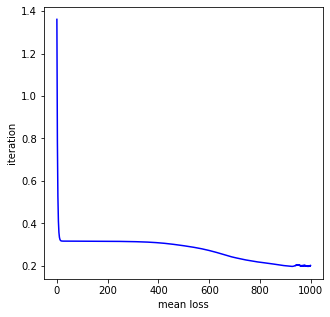

In [260]:
plot_curve(range(num_iterations), losses)

### Different Optimizers
 

#### SGD

#### SGD with momentum

#### RMSProp

#### Adam

#### Adam with Linear Warmup and linear decay